# rs_embed Playground

This notebook demonstrates **direct usage of `get_embedding`** from `rs_embed`,
without any wrapper utilities.

The goal is to clearly expose the **core toolkit API**:
- spatial inputs (`PointBuffer`, `BBox`)
- temporal specs (`year`, `range`)
- output specs (`pooled`, `grid`)
- returned `data` and `meta`

This is intended as a **transparent, reference-style notebook** rather than a benchmarking framework.


In [1]:
from rs_embed import BBox, PointBuffer, TemporalSpec, OutputSpec, get_embedding
from plot_utils import *

import json

## 1. Define spatial and temporal inputs

In [2]:
# Spatial: point + buffer
spatial_point = PointBuffer(
    lon=121.5,
    lat=31.2,
    buffer_m=2048,
)

# Spatial: bounding box
spatial_bbox = BBox(
    minlon=121.45,
    minlat=31.15,
    maxlon=121.50,
    maxlat=31.20,
)

# Temporal: single year
temporal_year = TemporalSpec.year(2024)

# Temporal: date range
temporal_range = TemporalSpec.range(
    "2022-06-01",
    "2022-09-01",
)

spatial_point, spatial_bbox, temporal_year, temporal_range

(PointBuffer(lon=121.5, lat=31.2, buffer_m=2048, crs='EPSG:4326'),
 BBox(minlon=121.45, minlat=31.15, maxlon=121.5, maxlat=31.2, crs='EPSG:4326'),
 TemporalSpec(mode='year', year=2024, start=None, end=None),
 TemporalSpec(mode='range', year=<function TemporalSpec.year at 0x150f08d09620>, start='2022-06-01', end='2022-09-01'))

## 2. Precomputed embedding example

- Spatial: `BBox`
- Temporal: `year`
- Output: `grid`


### 2.1 GSE_annual(Alpha Earth)


{'geodesic': False, 'crs': {'type': 'name', 'properties': {'name': 'EPSG:3857'}}, 'type': 'Polygon', 'coordinates': [[[13523270.13138274, 3656702.2802829933], [13527366.13138274, 3656702.2802829933], [13527366.13138274, 3660798.2802829933], [13523270.13138274, 3660798.2802829933], [13523270.13138274, 3656702.2802829933]]]}
data.shape: (64, 410, 410)
source: GOOGLE/SATELLITE_EMBEDDING/V1/ANNUAL


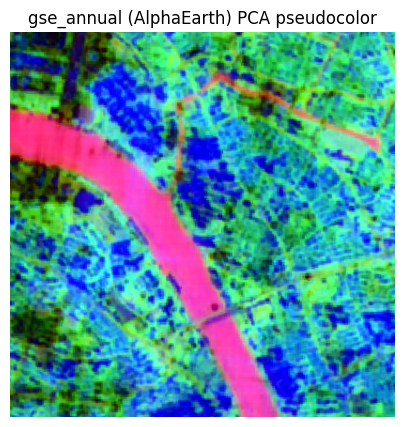

{'mean': array([ 0.07853824, -0.29107493,  0.1161385 , -0.01957924,  0.02499747,
        -0.07961908, -0.09171757, -0.04517604, -0.16079898,  0.08444491,
         0.04607062,  0.04059851, -0.15324387, -0.15063843, -0.11724014,
        -0.11368866,  0.08037771,  0.14151959, -0.07956102,  0.07384185,
        -0.04462529,  0.10088068, -0.10032278,  0.01416243, -0.05940819,
         0.23154068,  0.00040225, -0.0277066 ,  0.15224236,  0.0368964 ,
         0.0367008 ,  0.01560507, -0.07904538, -0.04380777,  0.11977525,
        -0.0081563 , -0.20165128, -0.06312177,  0.05876789,  0.02970741,
        -0.07101694, -0.02973392, -0.0059794 ,  0.04876955,  0.10008385,
         0.16855767, -0.06602319,  0.15204938,  0.12364287,  0.04426003,
        -0.08971214,  0.09532284, -0.1818591 ,  0.07876746,  0.19386826,
        -0.28169596,  0.03485641,  0.04957942,  0.03513833,  0.01825983,
        -0.02705266, -0.13622743, -0.08715788,  0.07614619], dtype=float32),
 'components': array([[-1.00033954e-01,

<Figure size 640x480 with 0 Axes>

In [3]:
emb = get_embedding(
    "gse_annual",
    spatial=spatial_point,
    temporal=temporal_year,
    output=OutputSpec.grid(scale_m=10),
)

print("data.shape:", emb.data.shape)
print("source:", emb.meta.get("source"))

plot_embedding_pseudocolor(
    emb,
    title="gse_annual (AlphaEarth) PCA pseudocolor",
)

### 2.2 Tessera

data.shape: (128, 419, 400)
meta keys: ['model', 'type', 'source', 'cache_dir', 'bbox_4326', 'preferred_year', 'chw_shape', 'tile_crs', 'mosaic_hw', 'crop_px_window', 'crop_hw', 'global_transform']


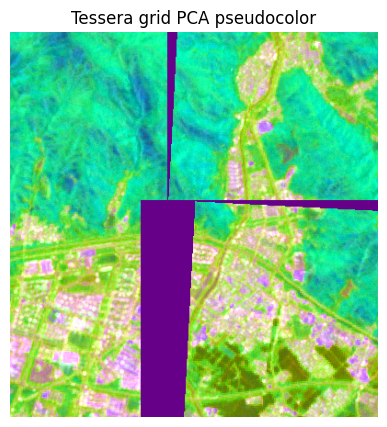

{'mean': array([ 3.3905637 , -2.9903228 , -1.0537369 ,  3.8264272 , -0.09996194,
        -0.7675758 , -0.94064593, -2.6090136 , -0.1054138 ,  2.3588216 ,
         0.36917734,  1.2820123 , -0.9469147 , -3.531931  , -0.5778051 ,
         0.76550525, -1.2919728 ,  3.625245  , -0.7010119 ,  0.19898622,
         1.8858957 ,  1.7925825 ,  2.2481353 , -2.5043778 ,  3.991929  ,
        -0.15287292, -2.1890292 ,  1.5597389 , -1.6873597 ,  0.8524422 ,
        -1.3758234 ,  2.4285011 , -1.3884562 ,  0.99071556,  1.4834734 ,
         0.60322076,  3.030042  , -1.0022991 , -0.76973087, -1.0384803 ,
         1.2500992 , -2.5877576 ,  2.2044919 ,  3.1579082 ,  0.6494902 ,
         0.45908487,  0.7914972 , -0.8732266 ,  1.2728775 , -4.0074077 ,
         0.93545735, -0.37190026, -2.1061227 , -1.7652626 ,  2.539162  ,
         1.2348347 ,  0.87967896,  1.3184923 ,  3.1986346 ,  1.2355412 ,
         0.8292059 , -0.6234678 ,  2.1569352 ,  2.8273275 ,  0.7852062 ,
        -1.4131272 , -1.2848397 , -0.111604

<Figure size 640x480 with 0 Axes>

In [3]:
emb_tessera_grid = get_embedding(
    "tessera",
    spatial=PointBuffer(lon=120.0, lat=30.0, buffer_m=2048),
    temporal=temporal_year,
    output=OutputSpec.grid(),
    backend="local",
)

print("data.shape:", emb_tessera_grid.data.shape)
print("meta keys:", list(emb_tessera_grid.meta.keys()))

plot_embedding_pseudocolor(
    emb_tessera_grid,
    title="Tessera grid PCA pseudocolor",
)

## 3. On-the-fly model: `remoteclip_s2rgb`

### 3.1 Pooled output
- Spatial: `PointBuffer`
- Temporal: date range
- Output: `pooled(mean)`


In [5]:
emb_remoteclip_pooled = get_embedding(
    "remoteclip_s2rgb",
    spatial=spatial_point,
    temporal=temporal_range,
    output=OutputSpec.pooled(),
)

print("data.shape:", emb_remoteclip_pooled.data.shape)
print("model:", emb_remoteclip_pooled.meta.get("model"))

print(json.dumps(emb_remoteclip_pooled.meta, indent=2)[:1500])

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Loading weights from local directory
data.shape: (768,)
model: remoteclip_s2rgb
{
  "model": "remoteclip_s2rgb",
  "type": "on_the_fly",
  "backend": "gee",
  "source": "COPERNICUS/S2_SR_HARMONIZED",
  "sensor": {
    "collection": "COPERNICUS/S2_SR_HARMONIZED",
    "bands": [
      "B4",
      "B3",
      "B2"
    ],
    "scale_m": 10,
    "cloudy_pct": 30,
    "composite": "median"
  },
  "temporal": {
    "mode": "range",
    "start": "2022-06-01",
    "end": "2022-09-01"
  },
  "input_time": "2022-07-17",
  "image_size": 224,
  "bands": [
    "B4",
    "B3",
    "B2"
  ],
  "scale_m": 10,
  "cloudy_pct": 30,
  "composite": "median",
  "start": "2022-06-01",
  "end": "2022-09-01",
  "ckpt": "MVRL/remote-clip-vit-base-patch32",
  "device": "auto",
  "pretrained_required": true,
  "auto_download": true,
  "hf_cache_dir": null,
  "ckpt_input": "MVRL/remote-clip-vit-base-patch32",
  "ckpt_local_dir": "/u/dingqi2/.cache/huggingface/hub/models--MVRL--remote-clip-vit-base-patch32/snapshots

### 3.2 Grid output

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Loading weights from local directory
data.shape: (768, 7, 7)
grid_hw: (7, 7)


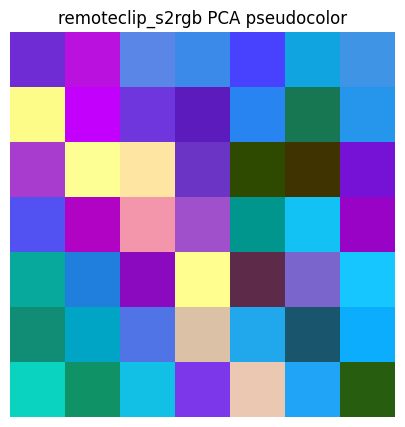

{'mean': array([-1.76906977e-02,  2.06798911e-01,  2.73429662e-01, -6.53784752e-01,
         6.10044062e-01, -8.09943557e-01,  6.67615160e-02, -3.52510810e-02,
        -1.79212436e-01, -1.80408806e-01, -3.89561802e-02,  5.67845702e-02,
         7.16561899e-02,  1.42418489e-01,  2.71564484e-01,  2.52629161e-01,
         5.96774578e-01, -2.27199662e-02, -1.01229660e-01,  1.30110338e-01,
        -1.21245250e-01, -2.17262626e-01, -2.87321925e-01,  2.59204894e-01,
        -3.17568094e-01,  7.02984706e-02, -1.82314496e-02,  2.72616625e-01,
         4.24753487e-01, -2.15760022e-01, -5.07746100e-01, -3.46954197e-01,
         1.86455011e-01,  9.60011408e-02,  1.97194085e-01,  1.94297552e-01,
        -2.10368648e-01,  5.18119812e-01,  4.66237329e-02, -2.38009810e-01,
         7.73941875e-01, -1.80109680e-01,  9.09734964e-02,  5.31410687e-02,
        -5.63504279e-01, -4.46667075e-01, -2.64440894e-01, -3.32388341e-01,
         2.62018740e-01,  2.16017276e-01,  1.84968486e-01,  3.50484729e-01,
    

<Figure size 640x480 with 0 Axes>

In [6]:
emb_remoteclip_grid = get_embedding(
    "remoteclip_s2rgb",
    spatial=spatial_point,
    temporal=temporal_range,
    output=OutputSpec.grid(),
)

print("data.shape:", emb_remoteclip_grid.data.shape)
print("grid_hw:", emb_remoteclip_grid.meta.get("grid_hw"))

plot_embedding_pseudocolor(
    emb_remoteclip_grid,
    title="remoteclip_s2rgb PCA pseudocolor",
)

## 4. Get Embedding Batches

In [ ]:
from rs_embed import BBox, PointBuffer, TemporalSpec, OutputSpec, get_embedding
from plot_utils import *

import json
from rs_embed import BBox, get_embeddings_batch

points = [
    PointBuffer(lon=121.5, lat=31.2, buffer_m=100),
    PointBuffer(lon=121.6, lat=31.3, buffer_m=100),
    PointBuffer(lon=120.0, lat=30.0, buffer_m=100),
]

embeddings = get_embeddings_batch(
    #"satmae_rgb",
    "tessera",
    spatials=points,
    temporal=TemporalSpec.year(2024),#range("2021-06-01", "2021-08-31"), #
    output=OutputSpec.grid(),
    backend="local"
)

for i, emb in enumerate(embeddings):
    print(f"Embedding {i} shape: {emb.data.shape}")


ModelError: Tiles have different CRS; cannot mosaic.

## 5. Data quality and visualization inspection (`inspect_gee_patch`)
- Use the Sentinel-2 SR RGB sample for quicklook. First, check the input data, then run the embedding.
- After running, the quicklook will be saved in the `_gee_checks/` directory and a statistical/histogram preview will be printed.

In [8]:
from pathlib import Path
import os

from rs_embed import SensorSpec, inspect_gee_patch

save_dir = Path(os.getenv("RS_EMBED_CHECK_SAVE_DIR", "./_gee_checks")).resolve()
save_dir.mkdir(parents=True, exist_ok=True)

sensor = SensorSpec(
    collection="COPERNICUS/S2_SR_HARMONIZED",
    bands=("B4", "B3", "B2"),
    scale_m=10,
    cloudy_pct=10,
    composite="median",
    fill_value=0.0,
    check_save_dir=str(save_dir),
)

check_out = inspect_gee_patch(
    spatial=spatial_point,
    temporal=TemporalSpec.range("2022-06-01", "2022-09-01"),
    sensor=sensor,
    value_range=(0, 10000),
)

print("ok:", check_out.get("ok"))
report = check_out.get("report", {})
for key in ["shape", "dtype", "nan_frac", "inf_frac", "fill_frac", "const_frac"]:
    if key in report:
        print(f"{key}: {report[key]}")



ok: True
shape: (3, 410, 410)
dtype: float32
fill_frac: 0.009030339083878644


band_quantiles (first 3 bands):
{
  "p01": [
    112.0,
    237.0,
    0.0
  ],
  "p50": [
    1064.0,
    1034.0,
    756.0
  ],
  "p99": [
    5128.0,
    5068.0,
    4896.0
  ]
}


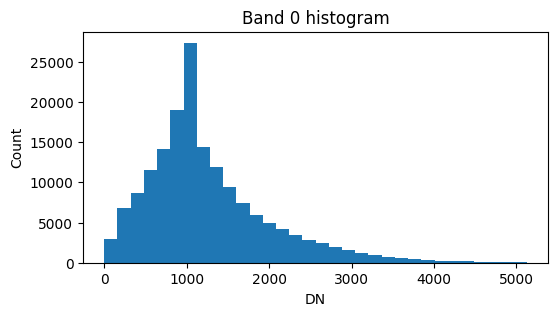

In [9]:
band_q = report.get("band_quantiles")
if band_q:
    preview = {k: v[:3] for k, v in band_q.items()}
    print("band_quantiles (first 3 bands):")
    print(json.dumps(preview, indent=2))

hist = report.get("hist")
if hist and hist.get("bins") and hist.get("counts"):
    try:
        import matplotlib.pyplot as plt
    except ImportError:
        plt = None
    if plt:
        bins = hist["bins"]
        counts = hist["counts"][0]
        plt.figure(figsize=(6, 3))
        plt.bar(bins[:-1], counts, width=bins[1] - bins[0], align="edge")
        plt.title("Band 0 histogram")
        plt.xlabel("DN")
        plt.ylabel("Count")
        plt.show()
    else:
        print("matplotlib not available, skip histogram plot")
else:
    print("histogram not available")




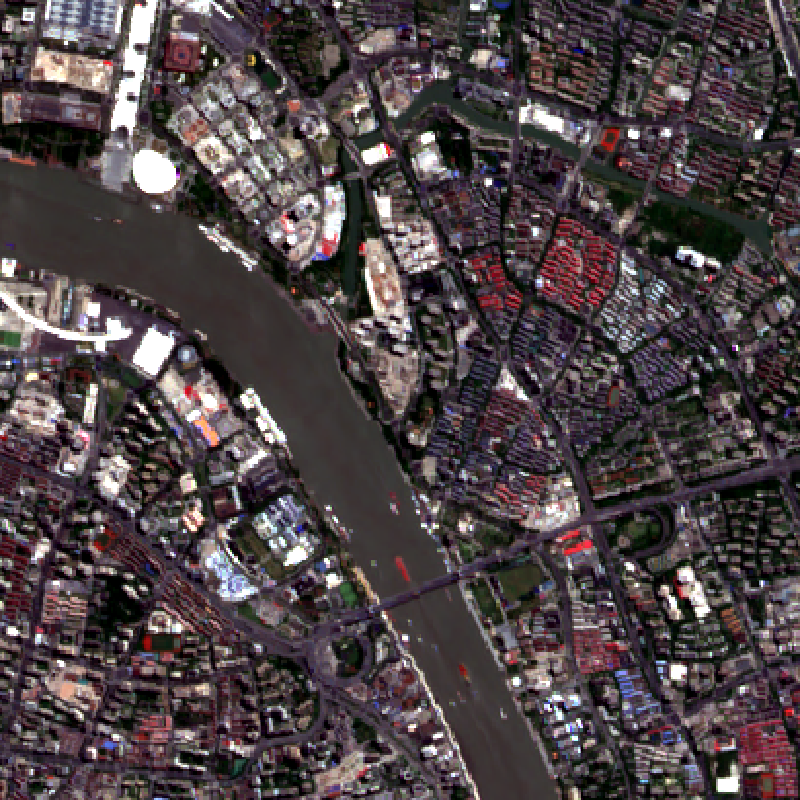

In [10]:
artifacts = check_out.get("artifacts") or {}
quicklook_path = artifacts.get("quicklook_rgb")
if quicklook_path and Path(quicklook_path).exists():
    from IPython.display import Image
    display(Image(filename=quicklook_path))
else:
    print("quicklook not saved; artifacts:", artifacts)

## 6. Export embedding as npz file

In [1]:

# from rs_embed import PointBuffer, TemporalSpec, OutputSpec
# from rs_embed.export import export_npz

# points = [
#     ("p1", PointBuffer(lon=121.5, lat=31.2, buffer_m=2048)),
#     ("p2", PointBuffer(lon=120.5, lat=30.2, buffer_m=2048)),
# ]

# for name, spatial in points:
#     export_npz(
#         out_path=f"exports/{name}_2022_summer.npz",
#         models=["remoteclip_s2rgb", "prithvi_eo_v2_s2_6b"],
#         spatial=spatial,
#         temporal=TemporalSpec.range("2022-06-01", "2022-09-01"),
#         output=OutputSpec.pooled(),
#         backend="gee",
#         device="auto",
#         save_inputs=True,
#         save_embeddings=True,
#         save_manifest=True,
#     )

from rs_embed import PointBuffer, TemporalSpec, OutputSpec, export_batch

import os
os.makedirs("exports", exist_ok=True)

names = ["p1", "p2"]
spatials = [
    PointBuffer(lon=121.5, lat=31.2, buffer_m=200),
    PointBuffer(lon=120.5, lat=30.2, buffer_m=200),
]

export_batch(
    out_dir="exports",
    names=names,
    spatials=spatials,
    temporal=TemporalSpec.range("2022-06-01", "2022-09-01"),
    models=["remoteclip_s2rgb", "prithvi_eo_v2_s2_6b"],
    output=OutputSpec.pooled(),
    backend="gee",
    device="auto",
    save_inputs=True,
    save_embeddings=True,
    save_manifest=True,
)


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Loading weights from local directory


/u/dingqi2/miniconda3/envs/torchgeo/lib/python3.12/site-packages/diffusers/models/transformers/transformer_kandinsky.py:168: UserWarning: CUDA is not available or torch_xla is imported. Disabling autocast.
  @torch.autocast(device_type="cuda", dtype=torch.float32)
/u/dingqi2/miniconda3/envs/torchgeo/lib/python3.12/site-packages/diffusers/models/transformers/transformer_kandinsky.py:272: UserWarning: CUDA is not available or torch_xla is imported. Disabling autocast.
  @torch.autocast(device_type="cuda", dtype=torch.float32)
/u/dingqi2/miniconda3/envs/torchgeo/lib/python3.12/site-packages/torch/cuda/__init__.py:1007: UserWarning: Can't initialize NVML
  raw_cnt = _raw_device_count_nvml()


[{'created_at': '2026-02-06T06:46:36Z',
  'backend': 'gee',
  'device': 'auto',
  'models': [{'model': 'remoteclip_s2rgb',
    'sensor': {'collection': 'COPERNICUS/S2_SR_HARMONIZED',
     'bands': ['B4', 'B3', 'B2'],
     'scale_m': 10,
     'cloudy_pct': 30,
     'fill_value': 0.0,
     'composite': 'median',
     'check_input': False,
     'check_raise': True,
     'check_save_dir': None},
    'describe': {'type': 'on_the_fly',
     'backend': ['gee'],
     'inputs': {'collection': 'COPERNICUS/S2_SR_HARMONIZED',
      'bands': ['B4', 'B3', 'B2']},
     'temporal': {'mode': 'range'},
     'output': ['pooled', 'grid'],
     'defaults': {'scale_m': 10,
      'cloudy_pct': 30,
      'composite': 'median',
      'ckpt': 'MVRL/remote-clip-vit-base-patch32',
      'image_size': 224},
     'notes': 'grid output is ViT token grid (patch-level), typically 7x7 for ViT-B/32 at 224px.'},
    'input': {'npz_key': 'input_chw__remoteclip_s2rgb',
     'dtype': 'float32',
     'shape': [3, 41, 41],
  

Inspect exported NPZ + visualize input patches

This notebook cell loads:
- `p1_2022_summer.json` (manifest)
- `p1_2022_summer.npz` (arrays)

It prints a summary and visualizes the saved input patches (`input_chw__*`).
RGB inputs are shown with a per-channel percentile stretch.

In [3]:
import json
from pathlib import Path
import numpy as np


npz_path = Path("exports/p1.npz")
json_path = Path("exports/p1.json")

assert npz_path.exists(), f"Missing: {npz_path}"
assert json_path.exists(), f"Missing: {json_path}"


z = np.load(npz_path)
with open(json_path, "r", encoding="utf-8") as f:
    manifest = json.load(f)

print("=== Manifest summary ===")
print("npz_path:", manifest.get("npz_path", str(npz_path)))
print("models:", manifest.get("models"))
print("spatial:", manifest.get("spatial"))
print("temporal:", manifest.get("temporal"))
print("backend:", manifest.get("backend"))
print("npz_keys:", manifest.get("npz_keys", z.files))

print("\n=== NPZ keys ===")
print(z.files)



=== Manifest summary ===
npz_path: exports/p1.npz
models: [{'model': 'remoteclip_s2rgb', 'sensor': {'collection': 'COPERNICUS/S2_SR_HARMONIZED', 'bands': ['B4', 'B3', 'B2'], 'scale_m': 10, 'cloudy_pct': 30, 'fill_value': 0.0, 'composite': 'median', 'check_input': False, 'check_raise': True, 'check_save_dir': None}, 'describe': {'type': 'on_the_fly', 'backend': ['gee'], 'inputs': {'collection': 'COPERNICUS/S2_SR_HARMONIZED', 'bands': ['B4', 'B3', 'B2']}, 'temporal': {'mode': 'range'}, 'output': ['pooled', 'grid'], 'defaults': {'scale_m': 10, 'cloudy_pct': 30, 'composite': 'median', 'ckpt': 'MVRL/remote-clip-vit-base-patch32', 'image_size': 224}, 'notes': 'grid output is ViT token grid (patch-level), typically 7x7 for ViT-B/32 at 224px.'}, 'input': {'npz_key': 'input_chw__remoteclip_s2rgb', 'dtype': 'float32', 'shape': [3, 41, 41], 'sha1': 'e2cf0de07aa608e24f29edfb6b9fea7abfcc8c5d', 'inspection': {'ok': True, 'report': {'name': 'gee_input_10ec692de905', 'ok': True, 'issues': [], 'shape':


=== Visualizing inputs ===
input_chw__remoteclip_s2rgb              shape=(3, 41, 41) dtype=float32 min=0 max=3.35e+03


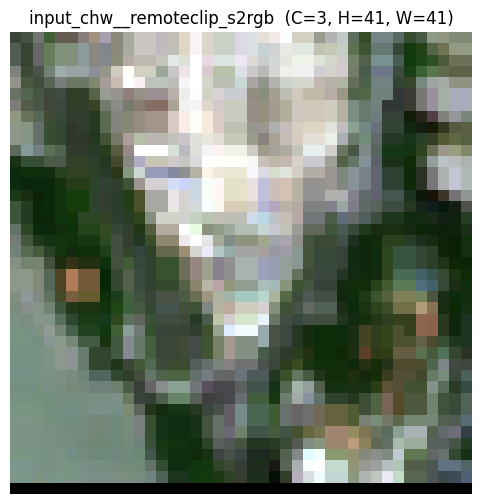

input_chw__prithvi_eo_v2_s2_6b           shape=(6, 41, 41) dtype=float32 min=0 max=4.57e+03


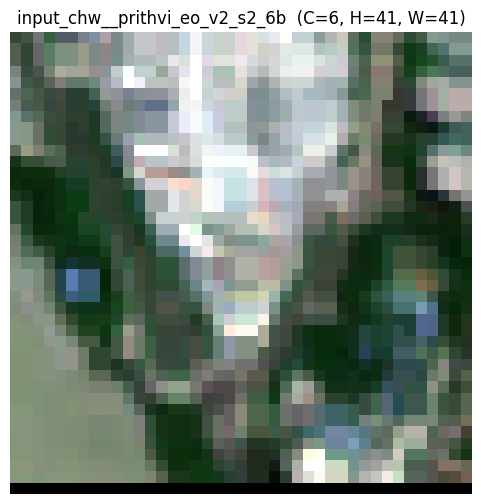

In [5]:
from plot_utils import show_input_chw
input_keys = [k for k in z.files if k.startswith("input_chw__")]
if not input_keys:
    print("No input_chw__* keys found. Keys:", z.files)
else:
    print("\n=== Visualizing inputs ===")
    for k in input_keys:
        show_input_chw(z[k], title=k, rgb_idx=(0, 1, 2), p_low=1, p_high=99)


artifacts = manifest.get("artifacts") or {}
if artifacts:
    print("\n=== Artifacts ===")
    print(json.dumps(artifacts, ensure_ascii=False, indent=2))